In [7]:
import pandas as pd
import numpy as np
import io

In [6]:
columns = ['user id', 'item id', 'rating', 'timestamp']

In [34]:
data = pd.read_csv('movielens/Movielens-02/u.data', delimiter="\t", names=columns)
data

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [36]:
# Basic statistics for data in terms of rating
data['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Frequency'>

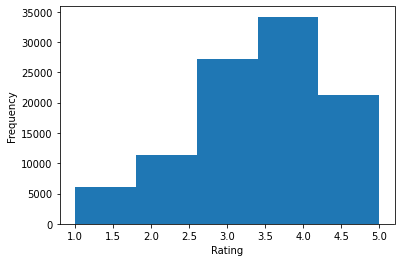

In [37]:
# Distribution of ratings in the form of a histogram
ratings_hist = data["rating"].plot(kind="hist", bins=5)
ratings_hist.set_xlabel("Rating")
ratings_hist

<AxesSubplot:xlabel='Rating'>

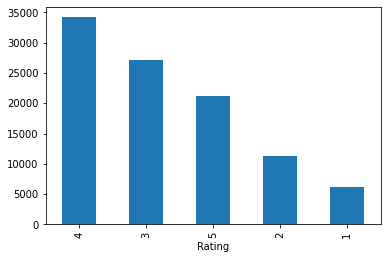

In [38]:
# Bar graph to show distribution of ratings
ratings_bar = data['rating'].value_counts().plot(kind='bar')
ratings_bar.set_xlabel("Rating")
ratings_bar

In [39]:
# Counts for ratings by item id
item_rating = data.groupby(["rating","item id"])["item id"].count()
item_rating

rating  item id
1       1           8
        2           8
        3          11
        4           6
        5           4
        6           2
        7           9
        8           4
        9          11
        10          2
        11          8
        12          2
        13         10
        14          6
        15          7
        16          3
        17         10
        18          2
        19          3
        20          7
        21         11
        22          5
        24          9
        25         10
        26          1
        27          7
        29         15
        30          1
        31          4
        32          3
                   ..
5       1503        1
        1512        4
        1514        1
        1516        1
        1524        3
        1529        1
        1536        1
        1537        1
        1540        1
        1558        4
        1589        1
        1591        2
        1592        2
        1594    

In [40]:
# Counts for rating by user id
user_rating = data.groupby(["rating","user id"])["user id"].count()
user_rating

rating  user id
1       1           25
        2            4
        3            8
        5           42
        6            7
        7           14
        8            5
        9            1
        11           4
        12           1
        13         130
        14           3
        15          24
        16           4
        17           4
        20           6
        21          43
        22          30
        23           4
        26           5
        28           1
        30           1
        32           1
        34           2
        35           1
        36           1
        37           1
        38          20
        40           3
        42           7
                  ... 
5       914          4
        915          2
        916         30
        917          8
        918         12
        919         30
        920          1
        921         16
        922         17
        923         21
        924         15
        925       

In [41]:
user_columns = ['user id', 'age', 'gender', 'occupation','zip code']

In [43]:
# loading in user data
user_data = pd.read_csv('movielens/Movielens-02/u.user', delimiter="|", names=user_columns)
user_data

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [45]:
movie_columns = ['movie_id', 'movie_title', 'release_date', 'video_release','IMDB','unknown','action','adventure','animation',
                'children','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance',
                'sci_fi','thriller','war','western']

In [47]:
# loading in user data
movie_data = pd.read_csv('movielens/Movielens-02/u.item', delimiter="|", names=movie_columns, encoding='latin-1')
movie_data

,movie_id,movie_title,release_date,video_release,IMDB,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
movies_drop = movie_data.drop(['release_date', 'video_release','IMDB','unknown','action','adventure','animation',
                'children','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance',
                'sci_fi','thriller','war','western'], axis=1)
movies_drop

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [51]:
data_drop = data.drop(['timestamp'],axis=1)
data_drop

,user id,item id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [179]:
# Merged data on item id and movie id
merged = pd.merge(left=data_drop, right=movies_drop, left_on='item id', right_on='movie_id')
merged

,user id,item id,rating,movie_id,movie_title
0,196,242,3,242,Kolya (1996)
1,63,242,3,242,Kolya (1996)
2,226,242,5,242,Kolya (1996)
3,154,242,3,242,Kolya (1996)
4,306,242,5,242,Kolya (1996)
5,296,242,4,242,Kolya (1996)
6,34,242,5,242,Kolya (1996)
7,271,242,4,242,Kolya (1996)
8,201,242,4,242,Kolya (1996)
9,209,242,4,242,Kolya (1996)


In [208]:
user_sort = merged.sort_values(by=['user id'])
user_sort

,user id,item id,rating,movie_id,movie_title
43606,1,12,5,12,"Usual Suspects, The (1995)"
79998,1,254,1,254,Batman & Robin (1997)
35906,1,189,3,189,"Grand Day Out, A (1992)"
69127,1,87,5,87,Searching for Bobby Fischer (1993)
51383,1,187,4,187,"Godfather: Part II, The (1974)"
71026,1,180,3,180,Apocalypse Now (1979)
97387,1,46,4,46,Exotica (1994)
6611,1,201,3,201,Evil Dead II (1987)
36126,1,64,5,64,"Shawshank Redemption, The (1994)"
6751,1,241,4,241,"Last of the Mohicans, The (1992)"


In [209]:
# Creating base matrix of 943x1682 of all zeros
matrix = pd.DataFrame(np.zeros((944,1683),dtype=int))
matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
# Change first column to represent user id
matrix = matrix.rename({0:'user_id'}, axis='columns')
matrix.head()

,user_id,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
# Change values to user id
for i in range(944):
    matrix.at[i,'user_id'] = i

In [212]:
matrix.head()

,user_id,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
# Populate matrix by putting rating based on movie and user
for index, row in merged.iterrows():
    user = row['user id']
    movie = row['movie_id']
    rating = row['rating']
    matrix.at[user,movie] = rating

In [218]:
# Displaying matrix with values filled. There are no values in the first row because there is no user_id value of 0
matrix

,user_id,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,3,4,3,3,5,4,1,5,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,4,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,4,0,0,0,0,0,2,4,4,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,5,0,0,5,5,5,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# To get specific rating need to get column then index that for specific row below example is for user 181 and movie 1325 
x = matrix[1325]
x[181]

1

In [219]:
# Creating the matrix as a .csv file
matrix.to_csv('data_matrix.csv', index=False)